In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set(style="whitegrid")
%matplotlib inline

DATA_FOLDER = 'Dataset/BeerAdvocate/'

BEERS_DATASET = DATA_FOLDER+"beers.csv"
BREWERIES_DATASET = DATA_FOLDER+"breweries.csv"
USERS_DATASET = DATA_FOLDER+"users.csv"

In [2]:
beers = pd.read_csv(BEERS_DATASET)
beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [3]:
breweries = pd.read_csv(BREWERIES_DATASET)
breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


Taking care of missing values

In [4]:
breweries.replace('UNKNOWN', np.nan, inplace=True)
breweries.dropna(subset='location',inplace=True)

Since we are interested in countries rather that in provinces or states within a country, we make sure to keep only the country as a location.

In [5]:
countries = ["United States","Canada","Utah","England","Wales","Scotland"]

# creates column with corresponding country where  beer is brewed
for country in countries:
    breweries["bool"] = breweries["location"].apply(lambda x: country in x)
    if country == "Utah":
        country = "United States"
    breweries["location"].loc[breweries["bool"]] = country
    del breweries['bool']

/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_4475/2410283685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries["location"].loc[breweries["bool"]] = country
/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_4475/2410283685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries["location"].loc[breweries["bool"]] = country
/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_4475/2410283685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [6]:
users = pd.read_csv(USERS_DATASET)
users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [7]:
sum(users.location.isnull())

31279

We drop the users for which no location is provided. 

In [8]:
users.dropna(subset='location',inplace=True)

In [9]:
sum(users.location.isnull())

0

Once again, we keep only countries

In [10]:
countries = ["United States","Canada","Utah","England","Wales","Scotland"]

# creates column with corresponding country where  beer is brewed
for country in countries:
    users["bool"] = users["location"].apply(lambda x: country in x)
    if country == "Utah":
        country = "United States"
    users["location"].loc[users["bool"]] = country
    del users['bool']

/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_4475/4058106191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["location"].loc[users["bool"]] = country
/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_4475/4058106191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["location"].loc[users["bool"]] = country
/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_4475/4058106191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

### Number of breweries per country (descending order)

Let us group the breweries by location.


In [11]:
breweries_country = breweries.groupby('location')
breweries_country.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
15249,31933,Albania,BrauHaus Brewery,3
15715,1692,Bahamas,Grand Bahama Brewing Company,1
16315,5024,Aruba,Aruba Red Star Beer,0
16750,5025,Aruba,Cerbeseria Arubano,0


In [12]:
nbr_breweries_by_country = breweries_country.size().sort_values(ascending=False)
nbr_breweries_by_country

location
United States      7434
Germany            1431
England            1029
Canada              860
France              402
                   ... 
Seychelles            1
Macau                 1
Chad                  1
Solomon Islands       1
Senegal               1
Length: 199, dtype: int64

### Number of different beers produced per country (descending order)

In [13]:
nbr_beers_by_country = breweries_country['nbr_beers'].agg('sum').sort_values(ascending=False)
nbr_beers_by_country


location
United States        276565
Canada                16993
England                9256
Germany                6180
Belgium                4485
                      ...  
Niger                     1
Dominica                  1
Equatorial Guinea         1
Mali                      0
Gibraltar                 0
Name: nbr_beers, Length: 199, dtype: int64

In a graphical way:

Text(0, 0.5, 'number of beers')

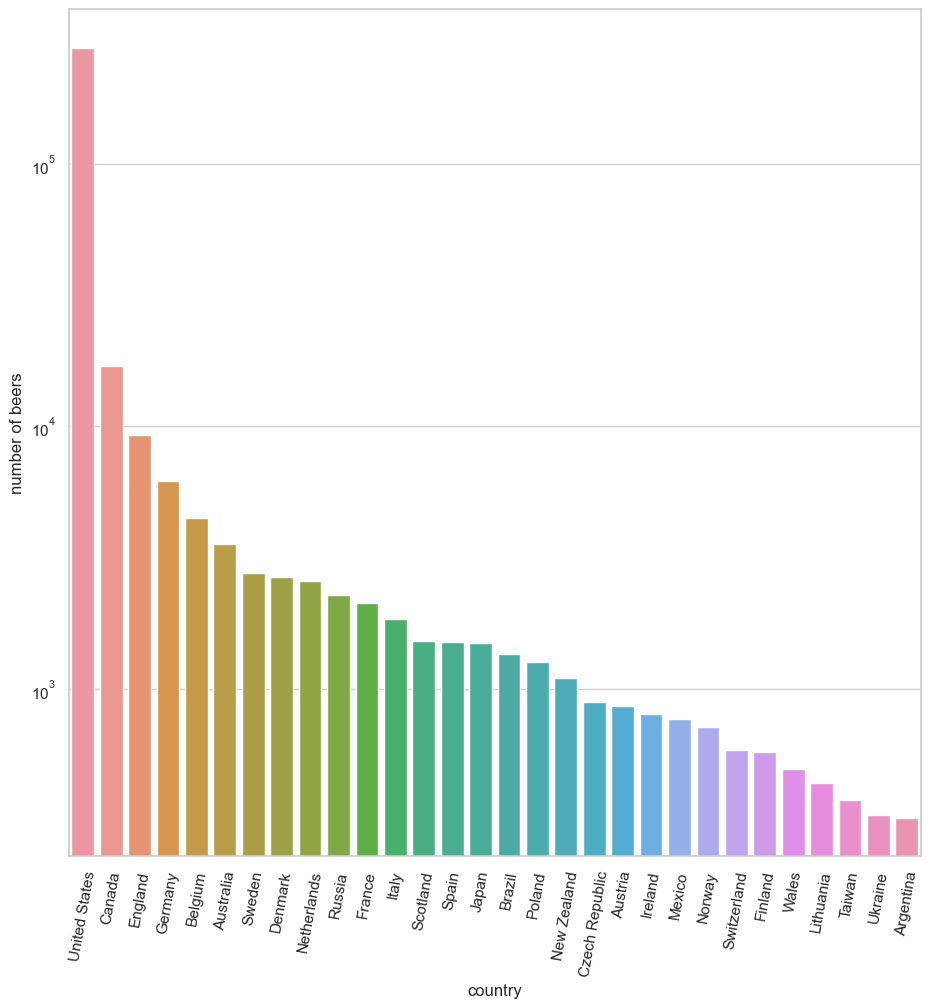

In [14]:
data_dict = {'country': nbr_beers_by_country[:30].index, 'nbr_beer':nbr_beers_by_country[:30].values}

plt.figure(figsize=(11,11))
ax = sns.barplot(x='country', y='nbr_beer', data=data_dict, log=True)
plt.xticks(rotation=80)
plt.xlabel('country')
plt.ylabel('number of beers')

We can observe that the top producing countries are mainly Western countries (USA, Western Europe, Canada, Australia)

The first non-Western country is Japan (15th position)

Does it exist a correlation between:
- population of the country and nbr of beers? 
- wealth of the country and nbr of beers?

### Number of different beer styles among beers that have been rated, produced in a certain country (descending order)

To determine the number of different beer styles per country, we need for each beer its style which is provided in the beers dataset but we also need the country of production which is not provided. The information of the country can be retrieved from the breweries dataset given that each beer is associated with a brewery and each brewery with a country.

Let us merge the two datasets mentioned above.

In [15]:
beers_merged = pd.merge(beers, breweries, left_on='brewery_id', right_on='id')
beers_merged = beers_merged.drop(columns='id')
beers_merged.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,name,nbr_beers
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5


In [16]:
beers_location_style = beers_merged[['location','style']].groupby('location').nunique()
beers_location_style = beers_location_style['style'].sort_values(ascending=False)
beers_location_style

location
Canada                      103
United States               103
Australia                   101
England                      99
Denmark                      99
                           ... 
Chad                          1
Central African Republic      1
Solomon Islands               1
Gabon                         1
Sao Tome and Principe         1
Name: style, Length: 197, dtype: int64

In [52]:
100*(nbr_beers_by_country['United States'] + nbr_beers_by_country['Canada'])/nbr_beers_by_country.sum()

83.19342972606854

More than 80% of the beers that are rated are produced in the USA or in Canada.

It thus makes sense that a higher number of beer styles are rated for those two countries

### Proportion of different beer styles of rated beers produced in a certain country  (descending order)

We create two dataframes, df and df1.

In [17]:
df = beers_merged.groupby('location').size()
df

location
Albania                      15
Algeria                      12
Andorra                       9
Angola                        2
Antigua & Barbuda             2
                           ... 
Virgin Islands (British)      1
Virgin Islands (U.S.)        24
Wales                       493
Zambia                        3
Zimbabwe                     18
Length: 197, dtype: int64

In [18]:
df1 = beers_merged.groupby(['location','style']).size()
df1

location  style                       
Albania   American Amber / Red Lager      1
          American Blonde Ale             1
          Czech Pilsener                  1
          Euro Dark Lager                 1
          Euro Pale Lager                 8
                                         ..
Zimbabwe  English India Pale Ale (IPA)    1
          English Pale Ale                1
          English Stout                   1
          Euro Pale Lager                 6
          Light Lager                     1
Length: 4777, dtype: int64

The proportion of beer styles of beers from a certain country that have been rated can be then obtained easily.
For Albania for exemple:

In [19]:
style_prop_Alb = 100*df1['Albania']/df['Albania']
style_prop_Alb

style
American Amber / Red Lager     6.666667
American Blonde Ale            6.666667
Czech Pilsener                 6.666667
Euro Dark Lager                6.666667
Euro Pale Lager               53.333333
Hefeweizen                     6.666667
Maibock / Helles Bock          6.666667
Märzen / Oktoberfest           6.666667
dtype: float64

Visualized in a pie chart:

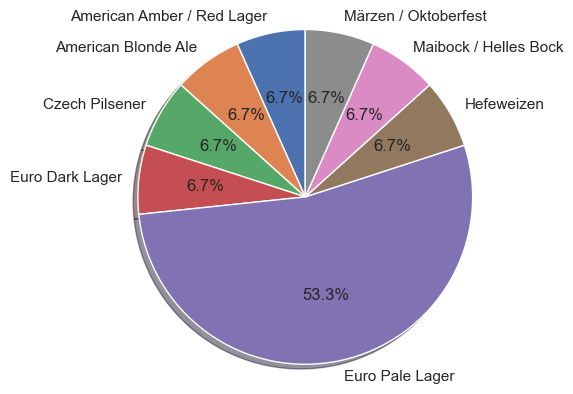

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(style_prop_Alb.values, labels=style_prop_Alb.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Let us now focus on the users

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122425 entries, 0 to 153703
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   nbr_ratings  122425 non-null  int64  
 1   nbr_reviews  122425 non-null  int64  
 2   user_id      122425 non-null  object 
 3   user_name    122424 non-null  object 
 4   joined       122425 non-null  float64
 5   location     122425 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.5+ MB


### Number of users per country (descending order)

In [22]:
users_country = users.groupby('location')
users_country.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,United States
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,United States
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
152255,2,1,cba.76658,CBA,1.146305e+09,British Indian Ocean Territory
153341,1,1,paxfolksen.1079444,PaxFolksen,1.449745e+09,Sint Maarten
153359,2,0,stephanos.745564,stephanos,1.375178e+09,Tanzania
153361,1,0,josephyego.1114248,JosephYego,1.456571e+09,Kenya


In [23]:
nbr_users_country = users_country.size().sort_values(ascending=False)
nbr_users_country

location
United States    113223
Canada             3324
England             791
Australia           520
Germany             372
                  ...  
Nicaragua             1
Nigeria               1
Palestine             1
Rwanda                1
Zimbabwe              1
Length: 145, dtype: int64

The users are overwhelmingly Americans.


In a more visual way:

Text(0, 0.5, 'number of users')

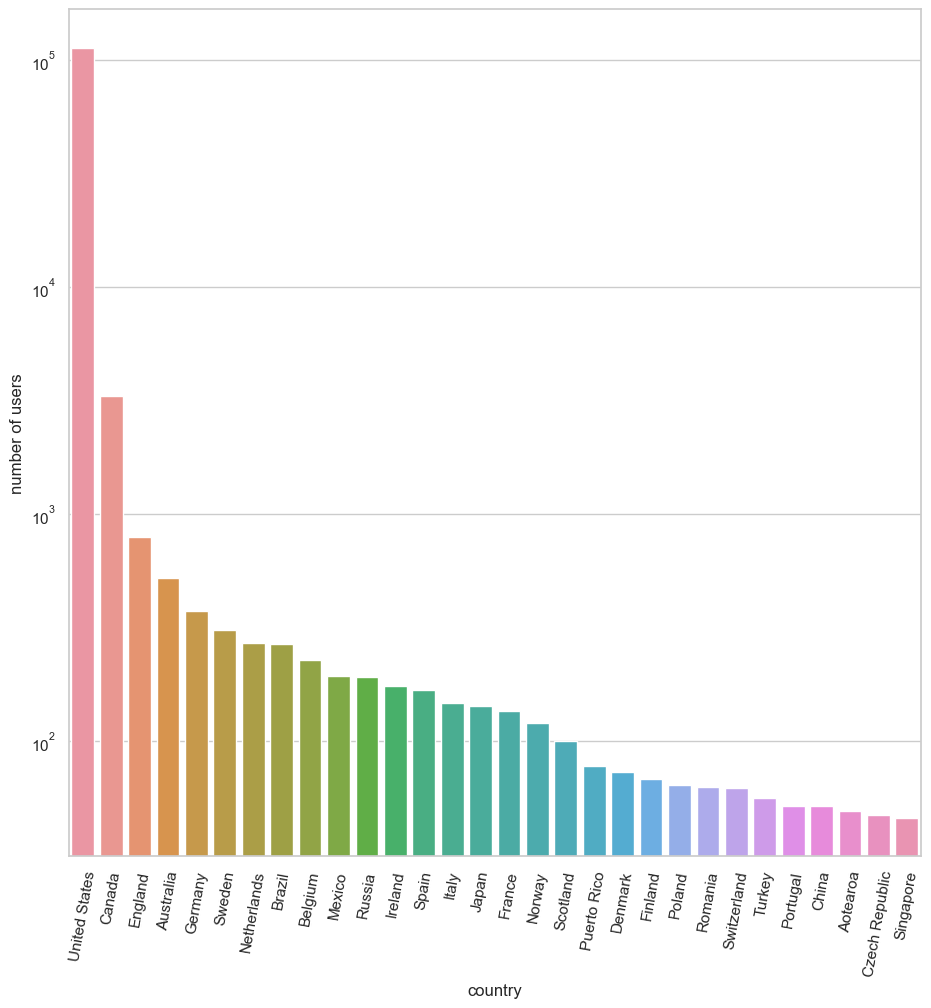

In [24]:
data_dict = {'country': nbr_users_country[:30].index, 'nbr_users':nbr_users_country[:30].values}

plt.figure(figsize=(11,11))
ax = sns.barplot(x='country', y='nbr_users', data=data_dict, log=True)
plt.xticks(rotation=80)
plt.xlabel('country')
plt.ylabel('number of users')

### Number of ratings/review per country (descending order)

In [25]:
nbr_ratings_country = users_country.sum().sort_values(by = 'nbr_ratings', ascending=False)
nbr_ratings_country

,nbr_ratings,nbr_reviews,joined
location,,,
United States,7303870,2241334,1.523708e+14
Canada,274512,126591,4.521690e+12
England,41597,21017,1.092240e+12
Australia,34915,25947,6.956633e+11
Sweden,29914,9067,4.147202e+11
...,...,...,...
Liberia,1,0,1.414580e+09
Kyrgyzstan,1,0,1.359630e+09
Gibraltar,1,1,1.275905e+09


### Average of ratings/review per country (descending order)

In [26]:
avg_ratings_country = users_country.mean().sort_values(by = 'nbr_ratings', ascending=False)
avg_ratings_country

,nbr_ratings,nbr_reviews,joined
location,,,
Jersey,1261.000000,374.000000,1.390734e+09
Lesotho,1153.000000,785.000000,1.203332e+09
Panama,274.115385,10.192308,1.386491e+09
Romania,267.031746,55.396825,1.410026e+09
Svalbard and Jan Mayen Islands,229.500000,57.000000,1.231931e+09
...,...,...,...
Kyrgyzstan,1.000000,0.000000,1.359630e+09
Gibraltar,1.000000,1.000000,1.275905e+09
Vanuatu,1.000000,1.000000,1.360795e+09


### Median of ratings/review per country (descending order)

In [27]:
med_ratings_country = users_country.median().sort_values(by = ['nbr_ratings','nbr_reviews'], ascending=False)
med_ratings_country

,nbr_ratings,nbr_reviews,joined
location,,,
Jersey,1261.0,374.0,1.390734e+09
Lesotho,1153.0,785.0,1.203332e+09
Svalbard and Jan Mayen Islands,229.5,57.0,1.231931e+09
Bolivia,223.0,28.5,1.337339e+09
Jordan,163.0,163.0,1.277374e+09
...,...,...,...
Peru,1.0,0.0,1.421795e+09
Senegal,1.0,0.0,1.451819e+09
Seychelles,1.0,0.0,1.374314e+09


Now let us use the matched dataset where a rating of a beer is associated with the user formulating it. 

In [28]:
DATA_FOLDER2 = 'Dataset/matched_beer_data/'

RATINGS_DATASET = DATA_FOLDER2+"ratings.csv"

In [29]:
ratings = pd.read_csv(RATINGS_DATASET)
ratings.head()

/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_4475/1449692808.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(RATINGS_DATASET)


,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,...,rb.6,rb.7,rb.8,rb.9,rb.10,rb.11,rb.12,rb.13,rb.14,rb.15
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
1,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
2,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
3,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
4,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong


Let us separate the ratings of BeerAdvocate from those of RateBeer.

In [30]:
columns_ba = ratings.columns[['ba' in column for column in ratings.columns]]
ratings_ba = ratings[columns_ba]
ratings_ba

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,ba.11,ba.12,ba.13,ba.14,ba.15,ba.16
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,review,style,taste,text,user_id,user_name
1,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,4.8,True,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel
2,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,3.0,True,American Adjunct Lager,NaN,NaN,visionthing.639993,visionthing
3,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.85,True,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong.608427,tiong
4,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.68,True,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong.608427,tiong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21960,8.5,4.5,3.5,28030,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.0,4.0,3.91,True,Tripel,4.0,Valeir Divers 33cl bottle from www.belgianbeer...,thebeerwatcher.630107,TheBeerWatcher
21961,8.0,4.25,4.25,5057,Fantôme Saison,738,Brasserie Fantôme,1484046000,4.0,4.0,4.08,True,Saison / Farmhouse Ale,4.0,NaN,jonj.982265,jonj
21962,5.2,NaN,NaN,349,Jupiler,134,Brasserie Piedboeuf,1393239600,NaN,NaN,3.0,True,Euro Pale Lager,NaN,NaN,maxilouis.784601,Maxilouis
21963,6.5,3.0,3.0,127162,Redenaar,32560,Brouwerij d'Oude Maalderij,1419764400,3.0,2.75,2.88,True,Belgian Pale Ale,2.75,NaN,simoen.728327,simoen


In [31]:
columns_rb = ratings.columns[['rb' in column for column in ratings.columns]]
ratings_rb = ratings[columns_rb]
ratings_rb

,rb,rb.1,rb.2,rb.3,rb.4,rb.5,rb.6,rb.7,rb.8,rb.9,rb.10,rb.11,rb.12,rb.13,rb.14,rb.15
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
1,11.3,4.0,10.0,2360,Rochefort Trappistes 10,406,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
2,5.0,2.0,3.0,17109,Myanmar Lager Beer,2921,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
3,5.0,4.0,8.0,35298,Cantillon Tyrnilambic Baie dArgousier,1069,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
4,5.0,4.0,8.0,113596,Cantillon Pikkulinnun Viskilambic,1069,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21960,8.5,4.0,7.0,56990,Contreras Valeir Divers,1954,Contreras,1323946800,15.0,4.0,3.7,Abbey Tripel,7.0,Valeir Divers 33cl bottle from www.belgianbeer...,137922,TheBeerWatcher
21961,8.0,4.0,8.0,7661,Fantôme Saison,1289,Brasserie Fantôme,1487502000,16.0,4.0,4.0,Saison,8.0,.................................................,394232,jonj
21962,5.2,5.0,3.0,8042,Jupiler,2004,Brasserie Piedboeuf (InBev),1393153200,1.0,1.0,1.2,Pale Lager,2.0,"Biere, foin, pain grillÃ©, terreux, banane, ca...",304802,maxilouis
21963,6.5,3.0,8.0,248989,dOude Maalderij Redenaar,15326,dOude Maalderij,1397037600,17.0,3.0,3.9,Belgian Ale,8.0,This is the first blond ale from this brewery....,276666,simoen


We are going to focus on the BeerAdvocate data.

We are going to merge it with the users dataframe introduced before to get the location of the user.

In [32]:
ratings_merged_ba = pd.merge(ratings_ba, users, left_on='ba.15', right_on='user_id')
ratings_merged_ba = ratings_merged_ba.drop(columns='ba.15')
ratings_merged_ba

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,...,ba.12,ba.13,ba.14,ba.16,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,Erzengel,6,6,erzengel.248045,Erzengel,1.220868e+09,Germany
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,American Adjunct Lager,NaN,NaN,visionthing,11,0,visionthing.639993,visionthing,1.322737e+09,Estonia
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,...,Gueuze,4.0,"750ml bottle, originally rated on 18.8.2012.Bo...",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,8.5,4.5,3.5,28030,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.0,4.0,...,Tripel,4.0,Valeir Divers 33cl bottle from www.belgianbeer...,TheBeerWatcher,11,11,thebeerwatcher.630107,TheBeerWatcher,1.319105e+09,Belgium
21960,8.0,4.25,4.25,5057,Fantôme Saison,738,Brasserie Fantôme,1484046000,4.0,4.0,...,Saison / Farmhouse Ale,4.0,NaN,jonj,77,0,jonj.982265,jonj,1.430561e+09,Faroe Islands
21961,5.2,NaN,NaN,349,Jupiler,134,Brasserie Piedboeuf,1393239600,NaN,NaN,...,Euro Pale Lager,NaN,NaN,Maxilouis,29,0,maxilouis.784601,Maxilouis,1.393240e+09,Belgium
21962,6.5,3.0,3.0,127162,Redenaar,32560,Brouwerij d'Oude Maalderij,1419764400,3.0,2.75,...,Belgian Pale Ale,2.75,NaN,simoen,225,0,simoen.728327,simoen,1.365761e+09,Belgium


We are now merging our resulting dataframe with the beers dataframe to have the information of the beer style, our analysis being based on it.

This step makes us lose a lot of data since a majority of beers in the matched dataset dataframe are not found in the beers dataframe.

In [33]:
ratings_merged_ba = pd.merge(ratings_merged_ba, beers, left_on='ba.3', right_on='beer_id')
ratings_merged_ba = ratings_merged_ba.drop(columns='ba.3')
ratings_merged_ba


,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.0,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.5,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.0,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.0,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,7.0,4.75,5.0,Juice Pants,37139,Maplewood Brewery & Distillery,1461319200,5.0,5.0,4.99,...,43,10,4.09,88.0,NaN,7.0,4.120930,0.289134,12,4.199167
5577,5.5,NaN,NaN,Dark 'n Curvy,1151,Piece Brewery & Pizzeria,1397642400,NaN,NaN,4.25,...,73,22,3.92,86.0,NaN,5.5,3.998904,0.197924,22,3.907273
5578,6.5,4.0,3.5,Vlasbier,634,Brouwerij Van Eecke N.V.,1230548400,1.5,2.0,2.58,...,17,11,3.44,82.0,NaN,6.5,3.486471,-0.624192,11,3.327273
5579,8.5,4.5,3.5,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.0,4.0,3.91,...,48,25,3.77,84.0,NaN,8.5,3.742500,-0.207188,25,3.823200


Getting rid of the non defined values in the beer rating column and converting it to float.

In [34]:
ratings_merged_ba.dropna(subset=['ba.8'], inplace=True)
ratings_merged_ba['ba.8'] = ratings_merged_ba['ba.8'].astype(float)

### Number of ratings for different beer styles of users from a certain country 

We first create a dataframe grouped by location of user.

In [35]:
ratings_merged_ba_country = ratings_merged_ba.groupby('location')
ratings_merged_ba.head()

,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.00,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.50,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.00,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.00,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615


We also create a dataframe grouped by location of user and style of beer.

In [36]:
ratings_merged_ba_country_style = ratings_merged_ba.groupby(['location','style'])
ratings_merged_ba_country_style.head()

,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.00,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.50,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.00,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.00,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,5.2,4.0,3.5,Dog Days Summer Lager,2493,Lafayette Brewing Co.,1242900000,3.50,4.0,3.58,...,2,1,3.06,NaN,NaN,5.2,2.290000,-2.436845,1,3.580000
5566,6.4,4.0,3.5,5 Vulture,25544,5 Rabbit Cerveceria,1401962400,4.50,4.5,4.23,...,284,55,3.51,80.0,NaN,6.4,3.495246,-0.699168,61,3.594426
5578,6.5,4.0,3.5,Vlasbier,634,Brouwerij Van Eecke N.V.,1230548400,1.50,2.0,2.58,...,17,11,3.44,82.0,NaN,6.5,3.486471,-0.624192,11,3.327273
5579,8.5,4.5,3.5,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.00,4.0,3.91,...,48,25,3.77,84.0,NaN,8.5,3.742500,-0.207188,25,3.823200


In [37]:
ratings_merged_ba_country_style.size()

location       style                  
Australia      American IPA                1
               American Pale Ale (APA)     1
               Belgian Strong Dark Ale     1
               English Bitter              1
               Märzen / Oktoberfest        2
                                          ..
United States  Vienna Lager                9
               Weizenbock                 38
               Wheatwine                   3
               Winter Warmer              12
               Witbier                    64
Length: 393, dtype: int64

### Average ratings of different beer styles given by users from a certain country

In [38]:
ratings_merged_ba_country_style.mean()['ba.8']

location       style                  
Australia      American IPA               3.500000
               American Pale Ale (APA)    3.500000
               Belgian Strong Dark Ale    4.000000
               English Bitter             3.500000
               Märzen / Oktoberfest       3.500000
                                            ...   
United States  Vienna Lager               4.083333
               Weizenbock                 3.980263
               Wheatwine                  2.666667
               Winter Warmer              3.500000
               Witbier                    3.683594
Name: ba.8, Length: 393, dtype: float64

Now we would like to sort these average ratings in descending order to find the beer styles that are the most enjoyed by user of a certain country.

We proceed by creating a dictionary for each country which itself contains a sorted dictionary which takes as a key a beer style and as value a tuple (average rating, number of ratings).

In [39]:
dict_country_style = {}

for key, group in ratings_merged_ba_country_style:
    if key[0] not in dict_country_style:
        dict_country_style[key[0]] = {}
    dict_country_style[key[0]][key[1]] = (np.mean(group['ba.8']), len(group['ba.8']))
    
for country in dict_country_style:
    dict_country_style[country] = dict(sorted(dict_country_style[country].items(), key=lambda item: item[1], reverse=True))



For exemple, we have for Spain:

In [40]:
dict_country_style['Spain']

{'Doppelbock': (5.0, 1),
 'Quadrupel (Quad)': (4.5, 1),
 'English Bitter': (4.25, 2),
 'American Black Ale': (4.25, 1),
 'Belgian Strong Pale Ale': (4.25, 1),
 'American IPA': (4.0, 2),
 'American Brown Ale': (4.0, 1),
 'American Pale Ale (APA)': (4.0, 1),
 'Dubbel': (4.0, 1),
 'American Adjunct Lager': (2.6666666666666665, 3),
 'Fruit / Vegetable Beer': (2.0, 1)}

This can be gathered in a dataframe as such:

In [41]:
data_Spain = pd.DataFrame.from_dict(dict_country_style['Spain'], orient = 'index')
data_Spain.columns = ['avg_rating','nbr_rating']
data_Spain['ranked_user'] = np.arange(1,len(data_Spain)+1)
data_Spain.index.name ='style'
data_Spain

,avg_rating,nbr_rating,ranked_user
style,,,
Doppelbock,5.000000,1,1
Quadrupel (Quad),4.500000,1,2
English Bitter,4.250000,2,3
American Black Ale,4.250000,1,4
Belgian Strong Pale Ale,4.250000,1,5
American IPA,4.000000,2,6
American Brown Ale,4.000000,1,7
American Pale Ale (APA),4.000000,1,8
Dubbel,4.000000,1,9


### Summary dataframes for each country

Let us now construct a new dictionary that takes the information contained in dict_country_style that gives for a certain country, the average rating of the different beer styles by people of this country. In addition to this, as was calculated in an earlier part, it also contains the proportion of beers from a certain style produced in a certain country (that have been rated). 

In [42]:
dict_country = {}

for country in ratings_merged_ba.location.unique():

    data_country1 = pd.DataFrame.from_dict(dict_country_style[country], orient = 'index')
    data_country1.columns = ['avg_rating','nbr_rating']
    data_country1['ranked_user'] = np.arange(1,len(data_country1)+1)
    data_country1.index.name ='style'

    dist_country = 100*df1[country]/df[country]
    data_country2 = pd.DataFrame.from_dict(dist_country.sort_values(ascending=False))
    data_country2.columns = ['production_%']
    data_country2['ranked_prod'] = np.arange(1,len(data_country2)+1)

    data_country = pd.merge(data_country1, data_country2, left_index=True, right_index=True)
    data_country['%_of_tot_nb_rating'] = 100*data_country['nbr_rating']/len(data_country['nbr_rating'])

    y = np.zeros(len(data_country['nbr_rating']), dtype=np.dtype(np.int16))
    y[np.argsort(data_country['nbr_rating'].values)[::-1]] = np.arange(1,len(data_country['nbr_rating'])+1)
    data_country['ranked_nbr_ratings'] = y

    data_country = data_country[['ranked_user', 'ranked_prod', 'ranked_nbr_ratings', 'avg_rating', 'nbr_rating', '%_of_tot_nb_rating', 'production_%']]

    dict_country[country] = data_country 

For each country, we now have the information of:
- the beer styles the most liked by the users of this country (ranked_user)
- the beer styles the most rated by the users of this country (ranked_nbr_ratings)
- the beer styles the most produced in breweries in this country (ranked_prod) (considering beers that have been rated)


For exemple, for Spain:

In [43]:
dict_country['Spain']

,ranked_user,ranked_prod,ranked_nbr_ratings,avg_rating,nbr_rating,%_of_tot_nb_rating,production_%
style,,,,,,,
Doppelbock,1,73,11,5.000000,1,9.090909,0.198282
Quadrupel (Quad),2,59,10,4.500000,1,9.090909,0.330469
English Bitter,3,29,3,4.250000,2,18.181818,0.925314
American Black Ale,4,24,9,4.250000,1,9.090909,1.387971
Belgian Strong Pale Ale,5,30,8,4.250000,1,9.090909,0.859220
American IPA,6,1,2,4.000000,2,18.181818,9.517515
American Brown Ale,7,18,7,4.000000,1,9.090909,1.982816
American Pale Ale (APA),8,2,6,4.000000,1,9.090909,7.270324
Dubbel,9,26,5,4.000000,1,9.090909,0.991408


or Australia:

In [44]:
dict_country['Australia']

,ranked_user,ranked_prod,ranked_nbr_ratings,avg_rating,nbr_rating,%_of_tot_nb_rating,production_%
style,,,,,,,
Quadrupel (Quad),1,80,8,4.5,1,12.5,0.252101
Belgian Strong Dark Ale,2,49,7,4.0,1,12.5,0.504202
Schwarzbier,3,59,6,4.0,1,12.5,0.420168
Märzen / Oktoberfest,4,38,1,3.5,2,25.0,0.756303
American IPA,5,2,5,3.5,1,12.5,6.246499
American Pale Ale (APA),6,1,4,3.5,1,12.5,8.907563
English Bitter,7,16,3,3.5,1,12.5,1.876751
Scotch Ale / Wee Heavy,8,48,2,3.5,1,12.5,0.504202


Beers have been rated by a varying number of users, a majority of them being rated only once or twice.


We observe that those beers tend to have more extreme ratings and we would like to be able to weight the rating of a beer based on the number of ratings it received to decrease the bias this introduces. 

array([[<AxesSubplot:title={'center':'nbr_ratings'}>]], dtype=object)

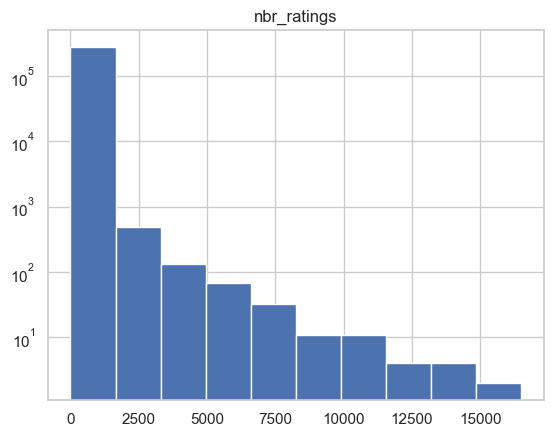

In [45]:
beers.hist(column= 'nbr_ratings', log=True)

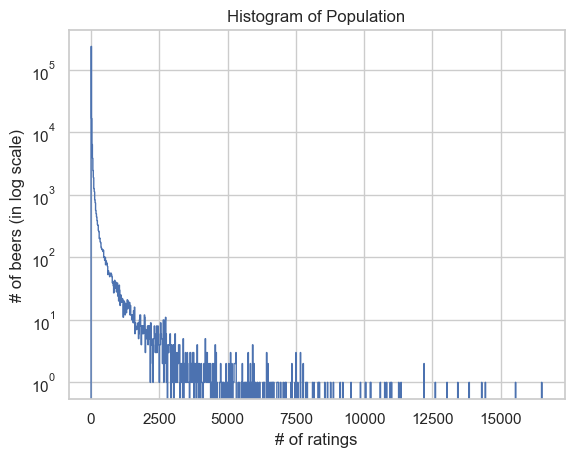

In [46]:
array_1000 = plt.hist(beers.nbr_ratings,bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('# of ratings')
plt.show()

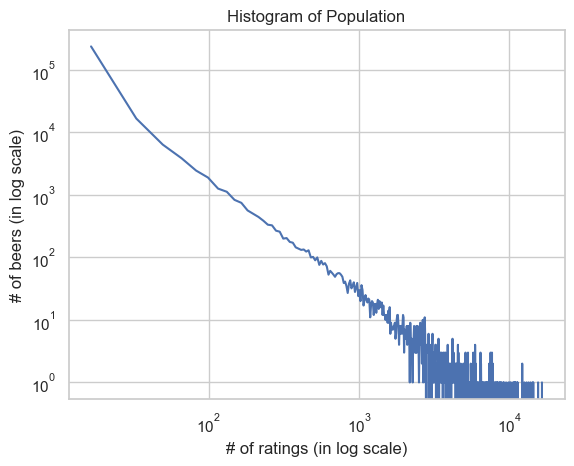

In [47]:
plt.loglog(array_1000[1][1:],array_1000[0])
plt.title('Histogram of Population')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('# of ratings (in log scale)')
plt.show()

This is a straight line on log-log axes: power law

In [48]:
T = 10

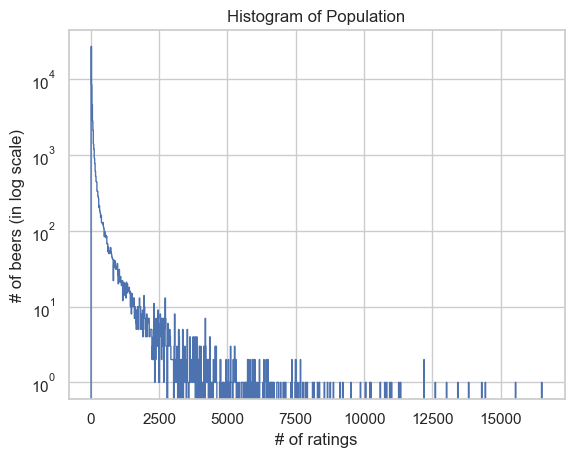

In [49]:
array_1000_T = plt.hist(beers[beers.nbr_ratings > T]['nbr_ratings'],bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('# of ratings')
plt.show()

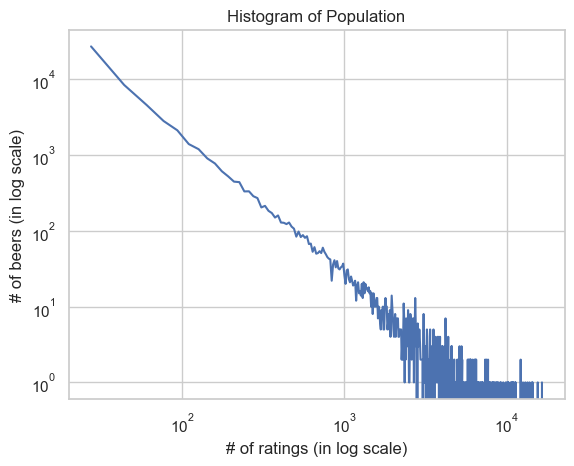

In [50]:
plt.loglog(array_1000_T[1][1:],array_1000_T[0])
plt.title('Histogram of Population')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('# of ratings (in log scale)')
plt.show()